In [7]:
import os
os.chdir("C:/Users/zetru/OneDrive/Mémoire python/")
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = 16, 9
plt.rcParams['axes.grid'] = True
import seaborn as sns
sns.set_theme(style="whitegrid")

In [8]:
df=pd.read_hdf('df_v5.h5','df_v5')
df

,cp,id,nom_carburant,id_carburant,maj,valeur,litre_brut,type,latitude,longitude,ville,stations_rayon_5km,competition_geo
0,01,1000001,Gazole,1,2022-01-03,0.702500,0.435626,R,46.201,5.198,SAINT-DENIS-LèS-BOURG,5,3
1,01,1000001,Gazole,1,2022-01-05,0.692500,0.447949,R,46.201,5.198,SAINT-DENIS-LèS-BOURG,5,3
2,01,1000001,Gazole,1,2022-01-10,0.728333,0.452874,R,46.201,5.198,SAINT-DENIS-LèS-BOURG,5,3
3,01,1000001,Gazole,1,2022-01-17,0.739167,0.484043,R,46.201,5.198,SAINT-DENIS-LèS-BOURG,5,3
4,01,1000001,Gazole,1,2022-01-21,0.769167,0.497616,R,46.201,5.198,SAINT-DENIS-LèS-BOURG,5,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4537444,95,95870010,SP98,6,2022-12-23,0.856233,0.488413,R,48.936,2.206,Bezons,15,4
4537445,95,95870010,SP98,6,2022-12-27,0.874567,0.487324,R,48.936,2.206,Bezons,15,4
4537446,95,95870010,SP98,6,2022-12-28,0.874567,0.484175,R,48.936,2.206,Bezons,15,4
4537447,95,95870010,SP98,6,2022-12-29,0.879567,0.477600,R,48.936,2.206,Bezons,15,4


In [9]:
df['nom_carburant'] = df['nom_carburant'].replace({'E10': 'SP95-E10'})

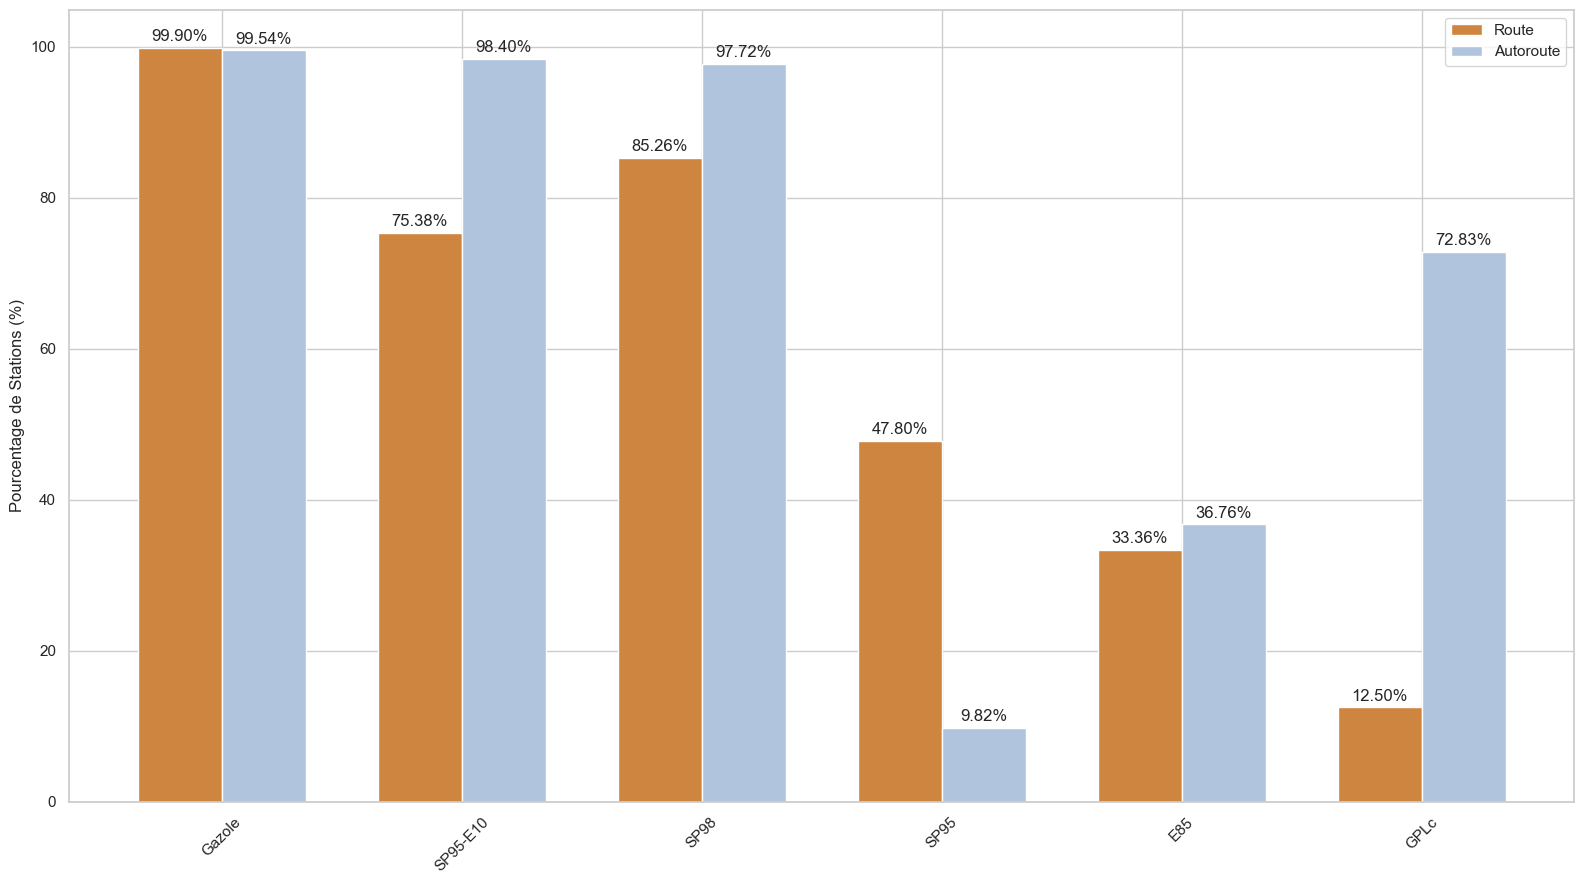

In [23]:
def calculate_percentage(df):
    station_carburants = df.groupby('id')['nom_carburant'].apply(lambda x: x.unique())
    carburant_types = pd.Series([item for sublist in station_carburants for item in sublist])
    carburant_counts = carburant_types.value_counts()
    carburant_percentage = (carburant_counts / len(station_carburants)) * 100
    return carburant_percentage

df_r = df[df['type'] == 'R']
df_a = df[df['type'] == 'A']
carburant_percentage_r = calculate_percentage(df_r)
carburant_percentage_a = calculate_percentage(df_a)

order = ['Gazole', 'SP95-E10', 'SP98', 'SP95', 'E85', 'GPLc']

carburant_percentage_r = carburant_percentage_r.reindex(order, fill_value=0)
carburant_percentage_a = carburant_percentage_a.reindex(order, fill_value=0)
fig, ax = plt.subplots(figsize=(16, 9))
index = range(len(order))
bar_width = 0.35

bars1 = ax.bar(index, carburant_percentage_r, bar_width, label='Route', color='peru')
bars2 = ax.bar([p + bar_width for p in index], carburant_percentage_a, bar_width, label='Autoroute', color='lightsteelblue')

for bar in bars1:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval + 0.5, f'{yval:.2f}%', ha='center', va='bottom')

for bar in bars2:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval + 0.5, f'{yval:.2f}%', ha='center', va='bottom')

ax.set_ylabel('Pourcentage de Stations (%)')
ax.set_xticks([p + bar_width / 2 for p in index])
ax.set_xticklabels(order)
ax.legend()
ax.set_xticklabels(order, rotation=45)
plt.tight_layout()
plt.savefig('graph/Part_stations_carburants_vendus.pdf')
plt.show()